**Aim-** Use TensorFlow to build our first Sequential model.


In [1]:
import numpy as np
import pandas as pd

## Generate Dataset



In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=10, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [3]:
print(X.shape)

(100, 10)


In [4]:
print(y.shape)

(100,)


## Visualize Dataset
This is the same code from Assignment 1

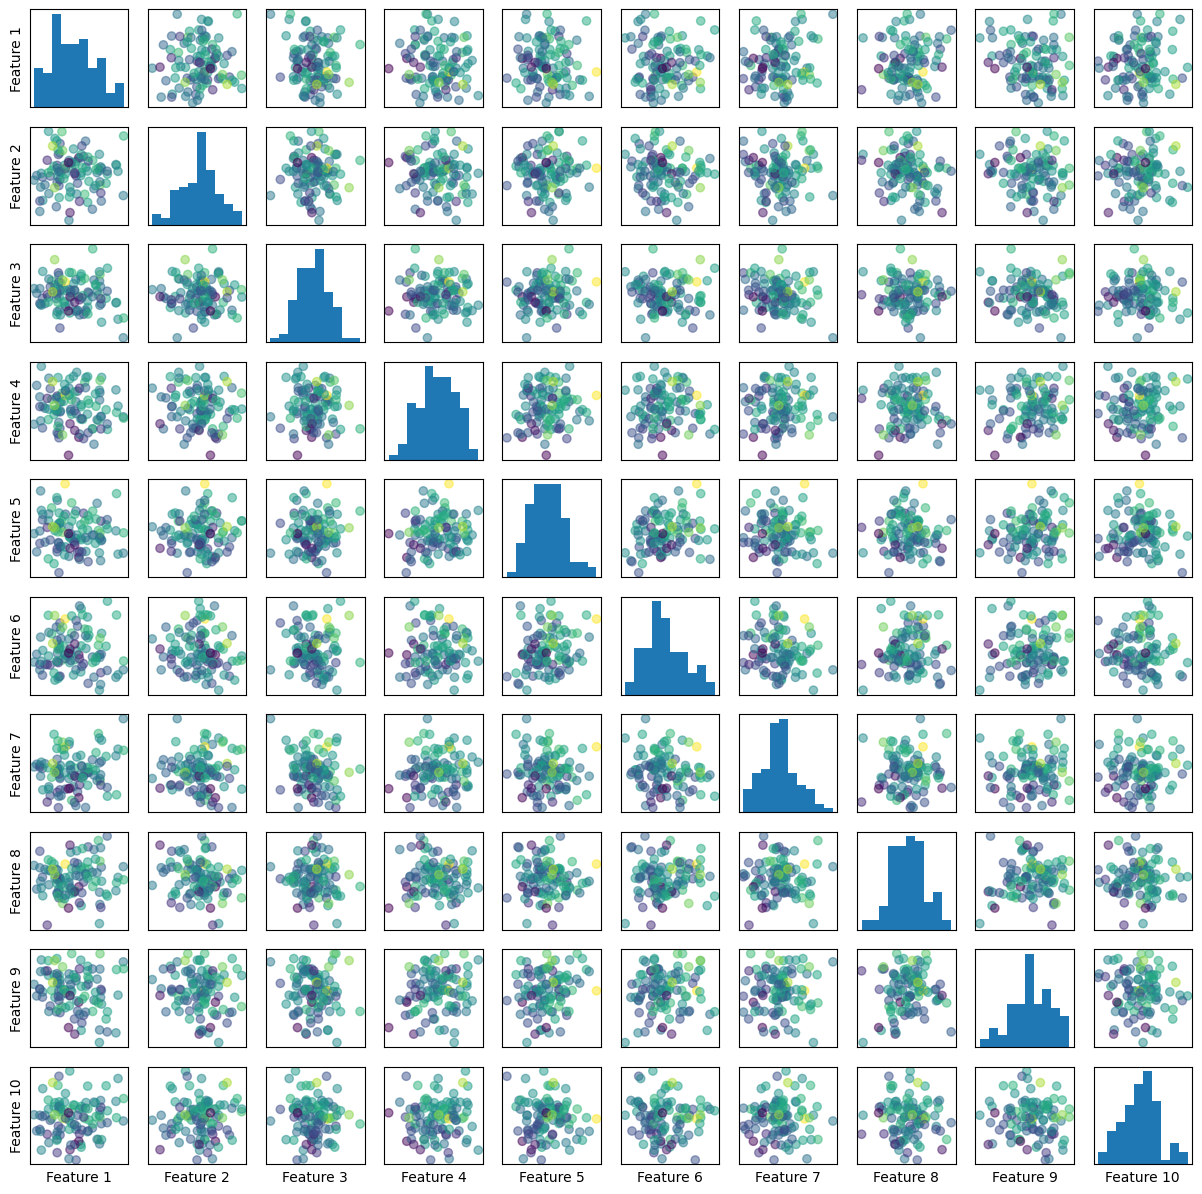

In [5]:
import matplotlib.pyplot as plt

# Your code here
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
for i in range(10):
    for j in range(10):
        if i == j:
            axes[i, j].hist(X[:, i], bins=10)
        else:
            axes[i, j].scatter(X[:, j], X[:, i], c=y, alpha=0.5)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        if i == 9:
            axes[i, j].set_xlabel(f"Feature {j+1}")
        if j == 0:
            axes[i, j].set_ylabel(f"Feature {i+1}")
plt.show()

[Note: Use this Link for help](https://www.tensorflow.org/tutorials/keras/regression)

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 10 \\
> Dense of shape 50 \\
> Dense of shape 10 \\
Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [6]:
import tensorflow as tf

# Your code here
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 50 ,activation = 'relu', input_shape=(10,)),
    tf.keras.layers.Dense( units = 10 ,activation = 'relu'),
    tf.keras.layers.Dense( units = 5 ,activation = 'relu'),
    tf.keras.layers.Dense( units = 1 ,activation = 'linear')
])

model.compile(loss='mse',
                optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01))
model.summary()

[[ 1.9756080e-01  1.0935215e-01  2.3735729e-01  1.2514041e-01
  -1.8082207e-02  7.0595697e-02 -2.0450354e-04  4.1994467e-02
  -1.6649231e-01  2.6927505e-02]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

Epoch 1/100
3/3 [==============================] - 1s 102ms/step - loss: 25090.9648 - val_loss: 26351.5059
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 32139.0430 - val_loss: 27019.0508
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 24613.0586 - val_loss: 27070.3867
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 24514.4258 - val_loss: 27143.7090
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 24434.1348 - val_loss: 27215.5371
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 24311.2285 - val_loss: 27277.3398
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 24234.2949 - val_loss: 27347.2715
Epoch 8/100
3/3 [==============================] - 0s 20ms/step - loss: 24177.3438 - val_loss: 27393.9883
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 24134.4121 - val_loss: 27460.4688
Epoch 10/100
3/3 [===========================

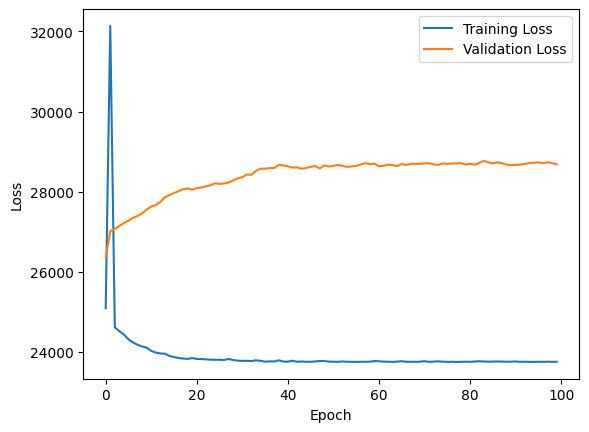

In [7]:
# Your code here
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [8]:
y_pred = model.predict(X_test)
y_true = y_test


1/1 [==============================] - 0s 219ms/step


In [15]:
print("{}\n-----------------\n{}".format(y_test,y_pred))

# Insert the function for R2 Score
def r2_score(y_true, y_pred):

  ssr = ((y_true - y_pred)**2).sum()

  y_mean = y_true.mean()
  sst = ((y_true - y_mean)**2).sum()

  r2 = 1 - (ssr/sst)  
    
    # return the r2 score
  return r2     
          
accu = r2_score(y_test, y_pred)
print("Accuracy:", accu)

[ 222.8413428  -167.55257764  173.47851111  -46.30080508  347.88313976
  -39.57303272  -90.5678071  -110.25255564   45.23767466  159.05964439
  -40.8659128  -150.61539387   57.23583983 -341.66437664  -99.75608753
  185.36682165  -90.05845252 -151.55502716 -135.33561166  137.10090807]
-----------------
[[36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]
 [36.48505]]
Accuracy: -20.3973147979327
